In [73]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

Meanings of some notations:  
```first```, ```second```, ```third```: correspond respectively to the first, second and third periodic solution.  
```low```, ```mid```, ```high```: intervals of $E$ respectively when $E<r\left(1-\frac{m}{K \gamma a}\right)$, when $r\left(1-\frac{m}{K \gamma a}\right)<E<r$ and when $E>r$.   
```_5```, ```_10```: to precise the value of $T$ used.

In [74]:
#The following functions are functions that give equilibria, x_p_0 and x_p(T) with respect to E
def give_x_star_second(E,*,r,K):
    '''This function gives the second equilibria of x with respect to E'''
    return K * (1 - E/r)

def give_x_p_0_second(E,*,r,K,T):
    '''This function gives the initial value of the second periodic solution of x with respect to E.'''
    x_p_0 = ( np.exp((r-E)*T) - 1 ) * K / ( np.exp(r*T) - 1 )
    return x_p_0

def give_x_p_T_second(E,*,r,K,T):
    '''This function gives the initial value of the second periodic solution of x with respect to E.'''
    x_p_T = ( 1 - np.exp((E-r)*T) ) * K / ( 1 - np.exp(-r*T) )
    return x_p_T

In [94]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.2
gamma = 0.8

t_0 = 0
t_n = 1000

tt = 1 #just to not have a missing argument t when we solve models


## 1. Find the periodic solution for one value of $E$

Plot to have an approximation of the initial value $(x_{p},y_{p})$

In [95]:
#Initial values
x_0 = 5
y_0 = 5
I_0 = 0
xyI_0 = [x_0, y_0, I_0]

#Bound: the maximum value of E to search the third periodic solution.
E_bound = r * ( 1 - m/(K*gamma*a) )

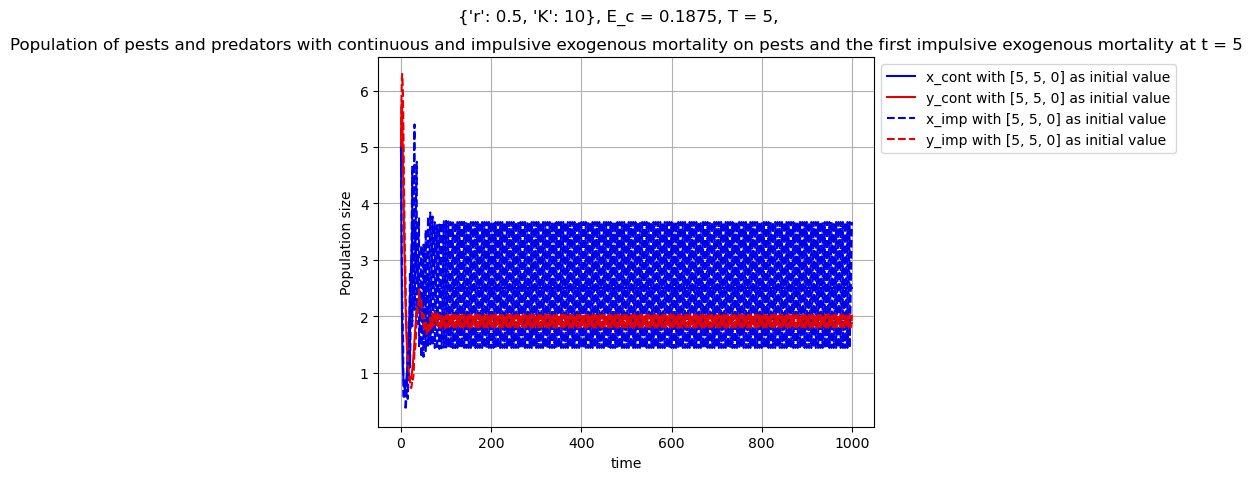

{'T': 5,
 'I_cont_final': 2487.739632269407,
 'I_imp_final': 2488.6939158290998,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [96]:
E_test = 0.5*E_bound #The value of E to try
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= xyI_0,
    xyI0_cont= xyI_0,
    t=tt,
    gamma=gamma,
    E_c=E_test,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=5,
    eps=0.01,
    plot_population=True
)

Get $(x_{p},y_{p})$

In [97]:
#New initial value
xyI_0 = [0.8, 2.2, 0]

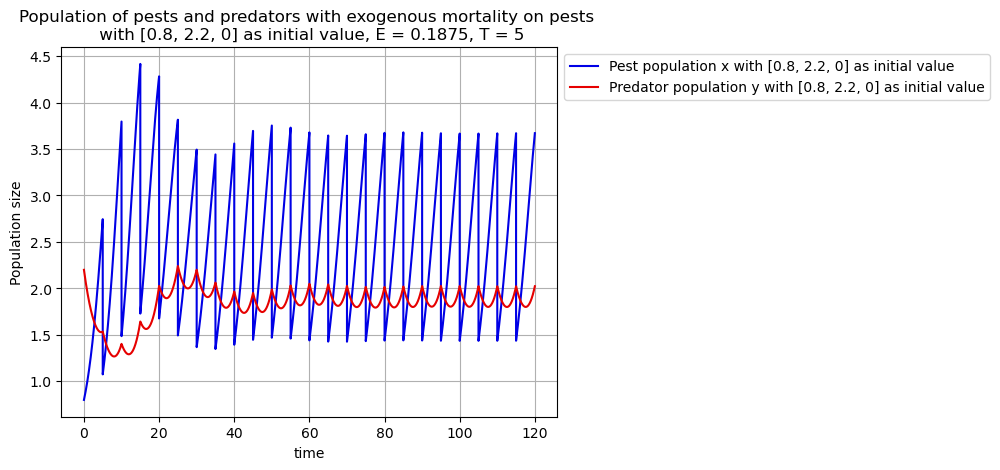

(1.4374415546520196, 2.023442797648768, 3.670635600540982, 2.023442797648768)

In [98]:
double_exo.find_x_y_p_with_error_prop_mortality_on_x(
    xyI= xyI_0,
    t=tt,
    gamma=gamma,
    E_c=E_test,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    error=1e-3,
    plot_population=True
)

By the model, we have got $y(nT^{+}) = y(nT)$. It is normal if we have $y_{p,0} = y_p(T)$

## 2. Storage of $(x_{p,0},y_{p,0})$ and $(x_{p}(T),y_{p}(T))$

We start at $E = 0$ which means no effort. It is similar to the continuous model with $E=0$:   
$(x_{p,0},y_{p,0}) = \left( \frac{m}{\gamma a},\frac{r}{a}\left( 1-\frac{m}{K \gamma a}\right)\right)$

We store the initial value of the periodic solutions for two different values of $T$: $5$ and $10$

In [99]:
#Initial value for E = 0
x_0 = m/(gamma*a)
y_0 = r/a * ( 1 - m/(K*gamma*a))

In [100]:
#T=5
low_E, x_p_0_third_low_5, y_p_0_third_low_5 , x_p_T_third_low_5, y_p_T_third_low_5 = double_exo.store_x_y_p_prop_mortality_on_x_with_error(
    xyI=[x_0,y_0,0],
    t=tt,
    gamma=gamma,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    E_c_start=0,
    E_c_stop=E_bound,
    E_c_num= 100,
    error= 1e-3
)

In [101]:
#T=10
low_E, x_p_0_third_low_10, y_p_0_third_low_10 , x_p_T_third_low_10, y_p_T_third_low_10 = double_exo.store_x_y_p_prop_mortality_on_x_with_error(
    xyI=[x_0,y_0,0],
    t=tt,
    gamma=gamma,
    T=10,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    E_c_start=0,
    E_c_stop=E_bound,
    E_c_num= 100,
    error= 1e-3
)

## 3. Bifurcation diagram

Drawing a bifurcation diagram with

-the three equilibria for the continuous model

-$(x_{p,0},y_{p,0})$ for two different values of $T$ ($T=5$ and $T=10$)

-$(x_{p}(T),y_{p}(T))$ for two different values of $T$ ($T=5$ and $T=10$)


The equilibria and the periodic solutions are different for each interval of $E$

### 3.1 $E<r\left(1-\frac{m}{K \gamma a}\right)$

#### 3.1.1 Equilibria

On the first interval ```low_E```, there are three equilibria: 
 
$(x^{*}_1,y^{*}_1) = (0,0)$ is unstable  

$(x^{*}_2,y^{*}_2)=\left( K\left(1-\frac{E}{r}\right),0 \right)$ is unstable  

$(x^{*}_3,y^{*}_3)=\left( \frac{m}{\gamma a},\frac{r}{a}\left( 1-\frac{m}{K \gamma a}\right) - \frac{E}{a}\right)$ is stable

In [102]:
x_star_first_low = np.zeros_like(low_E)

x_star_second_low = give_x_star_second(low_E, r=r, K=K)

x_star_third_low = (m / (gamma*a)) * np.ones_like(low_E)

#### 3.1.2 $(x_{p,0},y_{p,0})$

The initial periodic solutions on the first interval ```low_E``` are:

$(0,0)$ that is already given by ```x_star_first_low``` and that is unstable

$(\dfrac{e^{(r-E)T}-1}{e^{rT}-1}K,0)$ that is unstable

the one simulated and estimated by ```x_p_0_third_low_5``` and ```x_p_0_third_low_10``` and that is stable

In [103]:
x_p_0_second_low_5 = give_x_p_0_second(low_E,r=r,K=K,T=5)

x_p_0_second_low_10 = give_x_p_0_second(low_E,r=r,K=K,T=10)

#### 3.1.3 $(x_{p}(T),y_{p}(T))$

$(x_{p}(T),y_{p}(T))$ on the first interval ```low_E``` are:

$(0,0)$ that is already given by ```x_star_first_low``` and that is unstable

$(\dfrac{1 - e^{(E-r)T}}{ 1-e^{-rT}}K, 0)$ that is unstable

the one simulated and estimated by ```x_p_T_third_low_5``` and ```x_p_T_third_low_10``` and that is stable

In [104]:
x_p_T_second_low_5 = give_x_p_T_second(low_E,r=r,K=K,T=5)

x_p_T_second_low_10 = give_x_p_T_second(low_E,r=r,K=K,T=10)

### 3.2 $r\left(1-\frac{m}{K \gamma a}\right)<E<r$

In [105]:
mid_E = np.linspace(E_bound, r ,101)

#### 3.2.1 Equilibria

On the first interval ```mid_E```, there are two equilibria: 
 
$(x^{*}_1,y^{*}_1) = (0,0)$ is unstable  

$(x^{*}_2,y^{*}_2)=\left( K\left(1-\frac{E}{r}\right),0 \right)$ is stable  


In [106]:
x_star_first_mid = np.zeros_like(mid_E)

x_star_second_mid = give_x_star_second(mid_E, r=r, K=K)

#### 3.2.2 $(x_{p,0},y_{p,0})$

The initial periodic solutions on the first interval ```mid_E``` are:

$(0,0)$ that is already given by ```x_star_first_mid``` and that is unstable

$(\dfrac{e^{(r-E)T}-1}{e^{rT}-1}K,0)$ that is stable

In [107]:
x_p_0_second_mid_5 = give_x_p_0_second(mid_E,r=r,K=K,T=5)

x_p_0_second_mid_10 = give_x_p_0_second(mid_E,r=r,K=K,T=10)

#### 3.2.3 $(x_{p}(T),y_{p}(T))$

$(x_{p}(T),y_{p}(T))$ on the first interval ```mid_E``` are:

$(0,0)$ that is already given by ```x_star_first_mid``` and that is unstable

$(\dfrac{1 - e^{(E-r)T}}{ 1-e^{-rT}}K, 0)$ that is stable

In [108]:
x_p_T_second_mid_5 = give_x_p_T_second(mid_E,r=r,K=K,T=5)

x_p_T_second_mid_10 = give_x_p_T_second(mid_E,r=r,K=K,T=10)

### 3.3 $E>r$

In [109]:
high_E = np.linspace(r, 1.2*r ,101)

On this interval, there is only one equilibrium which is also the periodic solution : $(0,0)$

In [110]:
x_star_first_high = np.zeros_like(high_E)

### 3.4 Draw the bifurcation diagram

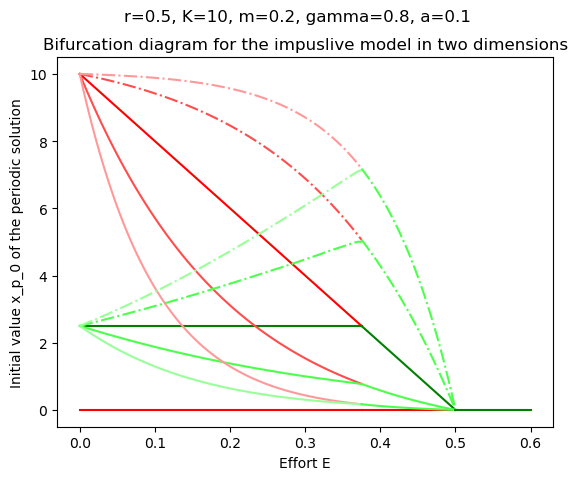

In [111]:
#First interval (low E)
##Equilibria
plt.plot(low_E, x_star_first_low, color = 'red') #unstable
plt.plot(low_E, x_star_second_low, color = 'red') #unstable
plt.plot(low_E, x_star_third_low, color = 'green') #stable

##(x_p_0)
###T=5
plt.plot(low_E, x_p_0_second_low_5, color = (1,0.3,0.3)) #unstable
plt.plot(low_E, x_p_0_third_low_5, color = (0.3,1,0.3)) #stable
###T=10
plt.plot(low_E, x_p_0_second_low_10, color = (1,0.6,0.6)) #unstable
plt.plot(low_E, x_p_0_third_low_10, color = (0.6,1,0.6)) #stable

##(x_p_T)
###T=5
plt.plot(low_E, x_p_T_second_low_5, color = (1,0.3,0.3), linestyle = '-.') #unstable
plt.plot(low_E, x_p_T_third_low_5, color = (0.3,1,0.3), linestyle = '-.') #stable
###T=10
plt.plot(low_E, x_p_T_second_low_10, color = (1,0.6,0.6), linestyle = '-.') #unstable
plt.plot(low_E, x_p_T_third_low_10, color = (0.6,1,0.6), linestyle = '-.') #stable



#Second interval (mid E)
##Equilibria
plt.plot(mid_E, x_star_first_mid, color = 'red') #unstable
plt.plot(mid_E, x_star_second_mid, color = 'green') #stable

##(x_p_0)
###T=5
plt.plot(mid_E, x_p_0_second_mid_5, color = (0.3,1,0.3)) #stable
###T=10
plt.plot(mid_E, x_p_0_second_mid_10, color = (0.3,1,0.3)) #stable

##(x_p_T)
###T=5
plt.plot(mid_E, x_p_T_second_mid_5, color = (0.3,1,0.3), linestyle = '-.') #stable
###T=10
plt.plot(mid_E, x_p_T_second_mid_10, color = (0.3,1,0.3), linestyle = '-.') #stable



#Third interval (high E)
plt.plot(high_E, x_star_first_high, color = 'green') #stable



#Legends
plt.xlabel('Effort E')
plt.ylabel('Initial value x_p_0 of the periodic solution')
plt.title('Bifurcation diagram for the impuslive model in two dimensions')
plt.suptitle(f'{r=}, {K=}, {m=}, {gamma=}, {a=}')
plt.show()